<a href="https://colab.research.google.com/github/SangBeom-Hahn/BOAZ/blob/main/CNN_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_2%EC%B0%A8_grayscale_%EC%84%B1%EA%B3%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 32 by 32가 해상도가 낮아서 못 알아들으니 해상도가 큰 모델을 만들어보자

1) 제목에 맞게resnet으로 예측

2) 내 모델을 224 by 224 by 3에 맞게 만들어서 mnist를 224 by 224로 만들어서 학습시키고 예측해보자(해상도를 높였으니 잘 알아보나 실험)

3) 그레이 스케일을 잘 해보자(유튜브 참고)

## 1) resnet으로 예측

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

# include_top을 하면 vgg 분류기까지 가져온다는 얘기
model = VGG16(weights='imagenet', include_top=True) 
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('/content/123.jpg'), (224, 224))
im = np.expand_dims(im, axis=0) # 1, 224, 224, 3이 됨
# im = im.reshape(1,im.shape[0],im.shape[1], im.shape[2])
im.astype(np.float32)

print(type(im))

# predict
out = model.predict(im)
index = np.argmax(out)
print(index)

#plt.plot(out.ravel())
#plt.show()

<class 'numpy.ndarray'>


281


# 넘파이화 실험

-> 무조건 넘파이화 해야한다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

# include_top을 하면 vgg 분류기까지 가져온다는 얘기
model = VGG16(weights='imagenet', include_top=True) 
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('/content/123.jpg'), (224, 224))
im = np.array(im)
im = np.expand_dims(im, axis=0) # 1, 224, 224, 3이 됨
im.astype(np.float32)

print(type(im))

# predict
out = model.predict(im)
index = np.argmax(out)
print(index)

#plt.plot(out.ravel())
#plt.show()

<class 'numpy.ndarray'>
281


### 2) 내 모델을 224 by 224 by 3에 맞게 만들어서 mnist를 224 by 224로 만들어서 학습시키고 예측해보자

궁금증 1 : 어떨땐 모델 input이 32, 32이고 어떨떈 32, 32, 3이지? -> 채널이 1이 아니면 무조건 3을 붙어야하나?

해결 : cnn이면 모델 input shape를 32 * 32 * 3으로하고 학습이미지도 60000 * 32 * 32 * 3으로 reshape해야하고 실험으로 넣을 이미지도 1 * 32 * 32 * 3으로 넣어야함

-> dnn이면 전부 다 채널 필요 없음/


In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import cv2

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(20, (5, 5), activation='relu',
			input_shape=INPUT_SHAPE))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(layers.Flatten())
		model.add(layers.Dense(500, activation='relu'))
		# a softmax classifier
		model.add(layers.Dense(classes, activation="softmax"))
		return model



# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS = 224, 224 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS)
NB_CLASSES = 10  # number of outputs = number of digits

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))



print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# cv로 하면 한장한장씩 resize 해야하는데? tf로하면 한 번에 됨 근데 ram 터짐,,,ㅋㅋㅋ

-> resize랑 reshape만 잘쓰면 되네~ 근데 mnist 784개가 224 * 224만큼 안 나와서 안된다 + 3)으로 원하는 거 성공했으니 패스!

In [ ]:
# im = cv2.resize(cv2.imread('/content/123.jpg'), (224, 224))
# X_train = cv2.resize(X_train, (224, 224))
# X_test = cv2.resize(X_test, (224, 224))

In [ ]:
# X_train = tf.image.resize(X_train, [224, 224])
# X_test = tf.image.resize(X_test, [224, 224])
# print(X_train.shape, X_test.shape)

In [ ]:
img = img.reshape((-1, 28, 28, 1))

In [43]:
for i in range(X_train.shape[0]):
  X_train[i] = X_train[i].reshape((-1, 224, 224, 1))

print(X_train)

ValueError: ignored

In [ ]:
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# 성공~~~축하해

# 3) gray scale 

https://copycoding.tistory.com/225

○ CV
- 데이터 모양 처리
1. img = cv2.imread("/content/제목 없음.png", cv2.2/IMREAD_GRAYSCALE)
2. img = cv2.resize(255-img, (28, 28)) # 이것만 해도 원래 안됐던 reshape은 됨
3. img = img.flatten() / 255.0
4. img = img.reshape((-1, 28, 28, 1))

※부수적인 것 5. 실수화 : im.astype(np.float32) ↑ 이 위에서 넘파이화는 이미 되어있다/

In [10]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [11]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [12]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 1
IMG_ROWS = 28
IMG_COLS = 28

#constant
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

#define the convnet 
def build(input_shape, classes):
	model = models.Sequential() 
	model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
	model.add(layers.MaxPooling2D(pool_size=(2, 2)))
	model.add(layers.Dropout(0.25)) 

	model.add(layers.Flatten())
	model.add(layers.Dense(512, activation='relu'))
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(classes, activation='softmax'))
	return model

y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
# model=build((IMG_ROWS, IMG_COLS), CLASSES)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               2769408   
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                      

In [14]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 101s 53ms/step - loss: 0.1755 - accuracy: 0.9467
Epoch 2/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0830 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0719 - accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0705 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0680 - accuracy: 0.9809


In [15]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0538 - accuracy: 0.9830

Test score: 0.0538104847073555
Test accuracy: 0.9829999804496765


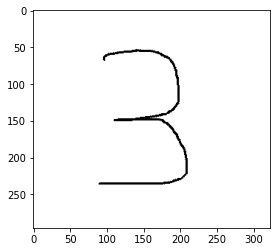

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/제목 없음.png")
plt.imshow(img)
plt.show()

In [31]:
import cv2
img = cv2.imread("/content/제목 없음.png", cv2.IMREAD_GRAYSCALE)

In [32]:
img.shape

(296, 323)

In [33]:
img = cv2.resize(255-img, (28, 28)) # 이것만 해도 원래 안됐던 reshape은 됨

In [34]:
img = img.flatten() / 255.0
img = img.reshape((-1, 28, 28, 1))

In [36]:
img.shape

(1, 28, 28, 1)

TypeError: ignored

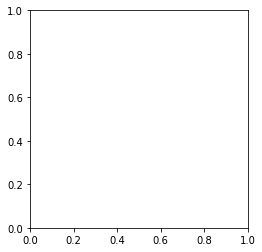

In [35]:
# 여전히 이건 안됨
plt.imshow(img)
plt.show()

In [38]:
y_prob = model.predict(img, verbose=0) 
predicted = y_prob.argmax(axis=-1)

In [39]:
print(predicted)

[3]
